# Analisis exploratorio de datos

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


## importar librerias


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##

1. Generar un d


## analisis explorario de datos


In [52]:
dataset = pd.read_csv("Titanic-Dataset.csv")
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
print(f"Rows: {dataset.shape[0]}")
print(f"Columns: {dataset.shape[1]}")

Rows: 891
Columns: 12


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
# columnas del dataset
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
# cantidad de datos nulos por columna
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
# tratar valores nulos en la columna Age
if "Age" in dataset.columns:
    dataset["Age"].fillna(dataset["Age"].mean(), inplace=True)
dataset.isnull().sum()

C:\Temp\ipykernel_3752\2645280259.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Age"].fillna(dataset["Age"].mean(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
# columna Cabin tiene muchos valores nulos, como supera al 50% del dataset se descarta
if "Cabin" in dataset.columns and dataset["Cabin"].isnull().sum() / len(dataset) > 0.5:
    dataset.drop(columns=["Cabin"], inplace=True)
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [59]:
# columna embarked, se usa la moda para llenar los valores nulos
if "Embarked" in dataset.columns:
    dataset["Embarked"].fillna(dataset["Embarked"].mode()[0], inplace=True)

dataset.isnull().sum()

C:\Temp\ipykernel_3752\2252949714.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Embarked"].fillna(dataset["Embarked"].mode()[0], inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Graficos


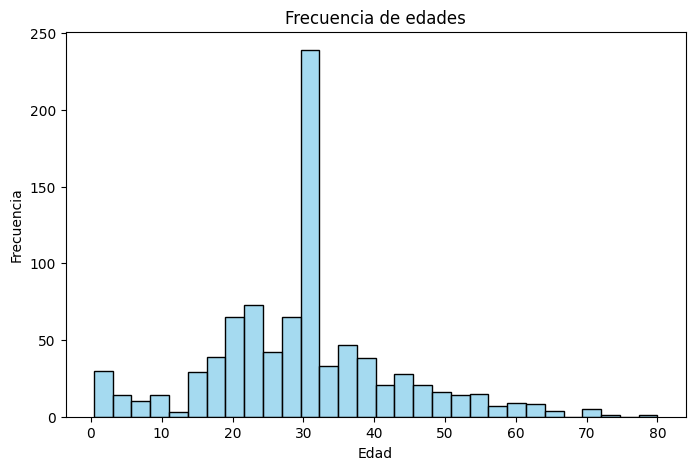

In [60]:
# Histograma de las edades
plt.figure(figsize=(8, 5))
sns.histplot(dataset["Age"], bins=30, color="skyblue")
plt.title("Frecuencia de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

C:\Temp\ipykernel_3752\1875745083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="Pclass", y="Age", palette="viridis")


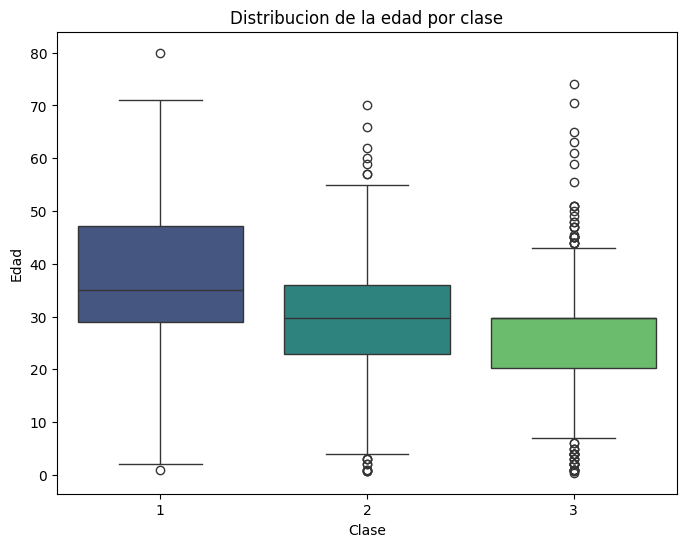

In [61]:
# diagrama de cajas de la edad
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x="Pclass", y="Age", palette="viridis")
plt.title("Distribucion de la edad por clase")
plt.xlabel("Clase")
plt.ylabel("Edad")
plt.show()

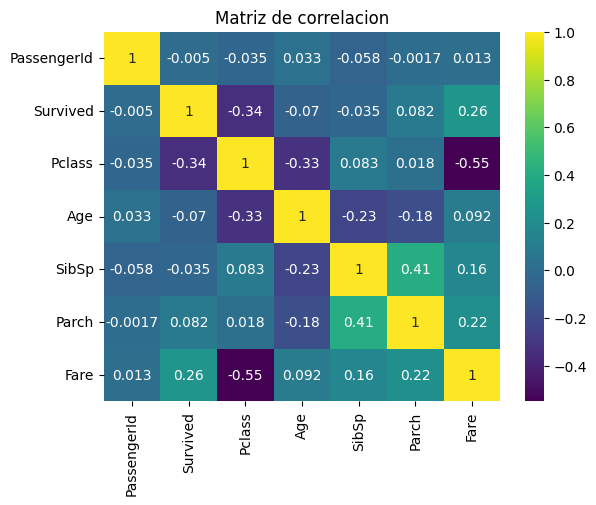

In [62]:
# Matriz de correlacion
dataset_numeric = dataset.select_dtypes(include="number")
corr_matrix = dataset_numeric.corr()

sns.heatmap(corr_matrix, annot=True, cmap="viridis")
plt.title("Matriz de correlacion")
plt.show()

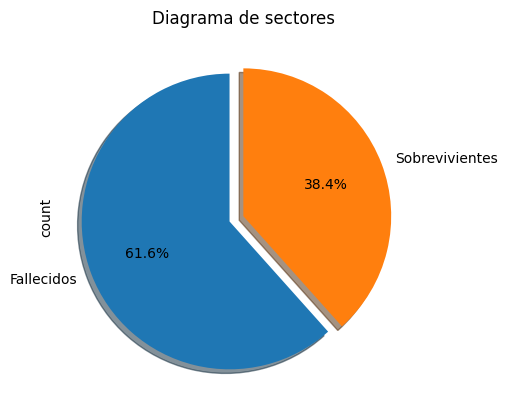

In [63]:
# diagrama de sctores de fallecidos y sobrevivientes
plt.figure()
dataset.Survived.value_counts().plot(
    kind="pie",
    labels=["Fallecidos", "Sobrevivientes"],
    title="Diagrama de sectores",
    autopct="%1.1f%%",
    startangle=90,
    shadow=True,
    explode=(0.1, 0),
)
plt.show()

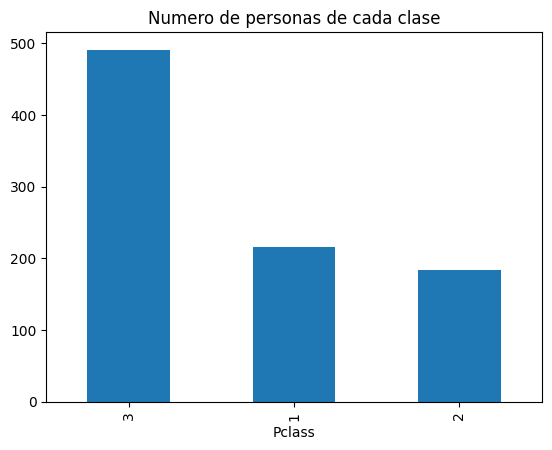

In [64]:
# Diagrama de barras con el numero de personas de cada clase
dataset.Pclass.value_counts().plot(kind="bar", title="Numero de personas de cada clase")
plt.show()

## s w


In [65]:
# informacion del pasajero 148
passenger_info = dataset.loc[dataset["PassengerId"] == 148]
passenger_info

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,S


In [66]:
# filas pares
dataset.iloc[::2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [67]:
# nombres de personas que iban en primera clase ordenadas
P_class_names = dataset.loc[dataset["Pclass"] == 1]["Name"].sort_values()
P_class_names

730                      Allen, Miss. Elisabeth Walton
305                     Allison, Master. Hudson Trevor
297                       Allison, Miss. Helen Loraine
498    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
460                                Anderson, Mr. Harry
                            ...                       
155                        Williams, Mr. Charles Duane
351             Williams-Lambert, Mr. Fletcher Fellows
55                                   Woolner, Mr. Hugh
555                                 Wright, Mr. George
325                           Young, Miss. Marie Grice
Name: Name, Length: 216, dtype: object

In [68]:
# mostrar el % de personas que sobrevivieron y fallecieron
percentage_survived = (
    dataset["Survived"].value_counts() / dataset["Survived"].count()
) * 100
percentage_survived

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

In [69]:
# mostrar % de personas que sobrevivieron en cada clase
survived_by_class = (
    dataset.groupby("Pclass")["Survived"].value_counts(normalize=True)
) * 100
survived_by_class


Pclass  Survived
1       1           62.962963
        0           37.037037
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: proportion, dtype: float64

In [81]:
# mostrar la edad media de las mujeres que viajaban en cada clase
median_age = dataset.groupby(["Pclass", "Sex"])["Age"].median()
print(median_age)
print()

median_age2 = dataset.groupby(["Pclass", "Sex"])["Age"].median().unstack()["female"]
print(median_age2)


Pclass  Sex   
1       female    32.500000
        male      36.000000
2       female    28.500000
        male      29.699118
3       female    28.000000
        male      29.699118
Name: Age, dtype: float64

Pclass
1    32.5
2    28.5
3    28.0
Name: female, dtype: float64


In [83]:
# a;adir columna booleanda para ver si el pasajero era menor de edad
dataset["is_minor"] = dataset["Age"] < 18
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_minor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False


In [ ]:
# mostrar el % de mayores y menores de edad que sobrevivieron en cada clase
percentage_minor = (
    dataset.groupby(["Pclass", "is_minor"])["Survived"].value_counts(normalize=True)
) * 100
percentage_minor

Pclass  is_minor  Survived
1       False     1           61.274510
                  0           38.725490
        True      1           91.666667
                  0            8.333333
2       False     0           59.006211
                  1           40.993789
        True      1           91.304348
                  0            8.695652
3       False     0           78.208232
                  1           21.791768
        True      0           62.820513
                  1           37.179487
Name: proportion, dtype: float64